### **Exploratory Data Analysis**
Understanding the dataset to explore how the data is present, selecting only the useful columns for visualisations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [3]:
file_path = "/kaggle/input/snapchat-sentiment-analysis/snapchat_sentiment.csv"
df = pd.read_csv(file_path)

In [4]:
print(df.shape)
display(df.head())

(228928, 11)


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,neg,neu,pos
0,6d3484a5-f27c-40f7-bc4d-712e42da2b0a,Rapture Awaji001,Easy,5,0,NaN,2025-09-10 11:54:55,NaN,0.092265,0.511526,0.396209
1,498b2247-8bdd-403b-8ead-4df244ad6d7a,FathimaFarhana,wow,5,0,13.39.0.45,2025-09-10 11:54:47,13.39.0.45,0.087225,0.547275,0.365501
2,bf629c03-8a27-4905-ae31-360127e325b7,TY GIRL ON SHOW,it is slow that is y I didn't give it 5 stars,1,0,13.57.0.49,2025-09-10 11:54:31,13.57.0.49,0.795436,0.187973,0.016592
3,b114eb0c-6fd9-4633-8151-04b4ca14b4fd,Raman Bepari,Worst app ever 😰🤮🤢🤮🤢🤢🤢,1,0,NaN,2025-09-10 11:53:39,NaN,0.980363,0.016104,0.003533
4,b5c2206a-73b9-4e09-9fe3-8208a220cc26,Jabbar Khan,Nazia Khan g,5,0,NaN,2025-09-10 11:50:42,NaN,0.211426,0.716701,0.071874


In [5]:
df.content.isna().sum()

np.int64(0)

In [6]:
df[df.duplicated(subset=['userName', 'content', 'score'])].shape

(0, 11)

In [7]:
# Converting the timestamp column to datetime format
df['at'] = pd.to_datetime(df['at'])

In [8]:
df.dtypes

,0
reviewId,object
userName,object
content,object
score,int64
thumbsUpCount,int64
reviewCreatedVersion,object
at,datetime64[ns]
appVersion,object
neg,float64
neu,float64


In [9]:
df_new = df[['content', 'score', 'at', 'neg', 'neu', 'pos']].copy()

In [10]:
df_new

,content,score,at,neg,neu,pos
0,Easy,5,2025-09-10 11:54:55,0.092265,0.511526,0.396209
1,wow,5,2025-09-10 11:54:47,0.087225,0.547275,0.365501
2,it is slow that is y I didn't give it 5 stars,1,2025-09-10 11:54:31,0.795436,0.187973,0.016592
3,Worst app ever 😰🤮🤢🤮🤢🤢🤢,1,2025-09-10 11:53:39,0.980363,0.016104,0.003533
4,Nazia Khan g,5,2025-09-10 11:50:42,0.211426,0.716701,0.071874
...,...,...,...,...,...,...
228923,Keep freezing and want to restart the app! I k...,3,2018-11-28 18:39:49,0.893438,0.096344,0.010219
228924,It sometimes don't let me send messages or any...,5,2020-12-10 03:55:12,0.056879,0.281261,0.661859
228925,I luv the app but why i give it 4 stars bc som...,4,2022-08-01 05:00:52,0.006860,0.041402,0.951738
228926,Great filters! Lets you call friends and famil...,5,2019-06-08 16:31:19,0.001641,0.012254,0.986104


In [11]:
# Assigning Sentiment Labels
df_new['SentimentLabel'] = df_new[['neg', 'neu', 'pos']].idxmax(axis=1)

In [12]:
df_new.head(5)

,content,score,at,neg,neu,pos,SentimentLabel
0,Easy,5,2025-09-10 11:54:55,0.092265,0.511526,0.396209,neu
1,wow,5,2025-09-10 11:54:47,0.087225,0.547275,0.365501,neu
2,it is slow that is y I didn't give it 5 stars,1,2025-09-10 11:54:31,0.795436,0.187973,0.016592,neg
3,Worst app ever 😰🤮🤢🤮🤢🤢🤢,1,2025-09-10 11:53:39,0.980363,0.016104,0.003533,neg
4,Nazia Khan g,5,2025-09-10 11:50:42,0.211426,0.716701,0.071874,neu


Aggregating Sentiment Counts to see the distribution of negative, neutral, and positive comments.


In [13]:
sentiment_aggregate = df_new.groupby('SentimentLabel').count()

In [14]:
sentiment_aggregate['Percentage'] = (sentiment_aggregate.content / sentiment_aggregate.content.sum()) * 100

In [15]:
sentiment_aggregate.reset_index(inplace=True)
display(sentiment_aggregate)

,SentimentLabel,content,score,at,neg,neu,pos,Percentage
0,neg,87044,87044,87044,87044,87044,87044,38.022435
1,neu,36631,36631,36631,36631,36631,36631,16.001101
2,pos,105253,105253,105253,105253,105253,105253,45.976464


/tmp/ipython-input-3150886972.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(sEntiment_order ,color='#242424')


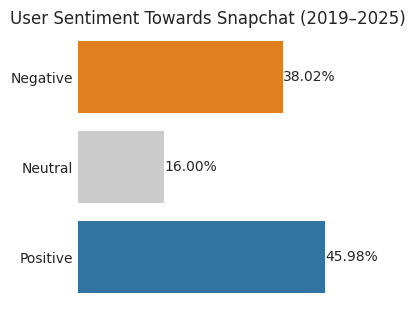

In [16]:
plt.figure(figsize=(4, 3))
colors = ['#ff7f00', '#cccccc', '#1f78b4']
sEntiment_order = ['Negative', 'Neutral', 'Positive']
ax = sns.barplot(data=sentiment_aggregate, y='SentimentLabel', x="Percentage", hue='SentimentLabel', palette=colors)
for container in ax.containers:
    labels = [f'{v.get_width():.2f}%' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge' ,color='#242424')

sns.despine(left=True, bottom=True)
ax.xaxis.set_visible(False)
ax.set_yticklabels(sEntiment_order ,color='#242424')
ax.set_ylabel("")
ax.set_xlabel("")
plt.tight_layout()
ax.set_title("User Sentiment Towards Snapchat (2019–2025)", color='#242424')
ax.tick_params(axis='y', length=0)
plt.show()

The overall sentiment in user comments is largely positive (~ 46%), though a significant portion of negative sentiments (~38%) is present.

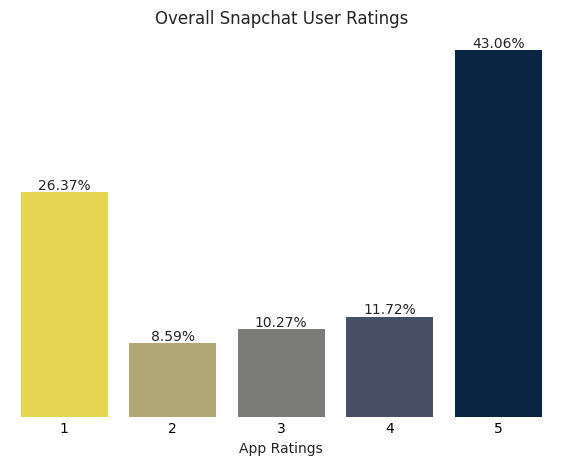

In [17]:
rating_counts = df_new['score'].value_counts()
rating_percentages = (rating_counts / rating_counts.sum()) * 100

plt.figure(figsize=(7, 5))
ax = sns.barplot(x=rating_percentages.index, y=rating_percentages.values, palette="cividis_r", hue=rating_percentages.index)

for container in ax.containers:
    labels = [f'{v.get_height():.2f}%' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge', color='#242424')
sns.despine(left=True, bottom=True)
ax.yaxis.set_visible(False)
plt.title("Overall Snapchat User Ratings",color='#242424')
plt.xlabel("App Ratings",color='#242424')
ax.get_legend().remove()
ax.tick_params(axis='x', length=0)
plt.show()

In [18]:
# Adding an year column
df_new['year'] = df_new['at'].dt.year

In [19]:
df_new[df_new.year==2016].index[0]

np.int64(133487)

In [20]:
df_new.drop(df_new[df_new.year==2016].index[0], axis=0, inplace=True)

In [21]:
df_sentiment_by_year = df_new.groupby(['year', 'SentimentLabel']).size()
display(df_sentiment_by_year)

year  SentimentLabel
2018  neg                2896
      neu                 336
      pos                1548
2019  neg               10747
      neu                1202
      pos                4833
2020  neg               11032
      neu                1350
      pos                6096
2021  neg                9807
      neu                1414
      pos                5673
2022  neg                9446
      neu                1286
      pos                4552
2023  neg               13355
      neu                1433
      pos                4262
2024  neg               19009
      neu               17110
      pos               42920
2025  neg               10752
      neu               12500
      pos               35368
dtype: int64

In [22]:
def thousands_formatter(x, pos):
    return f'{x / 1000:,.0f} k'

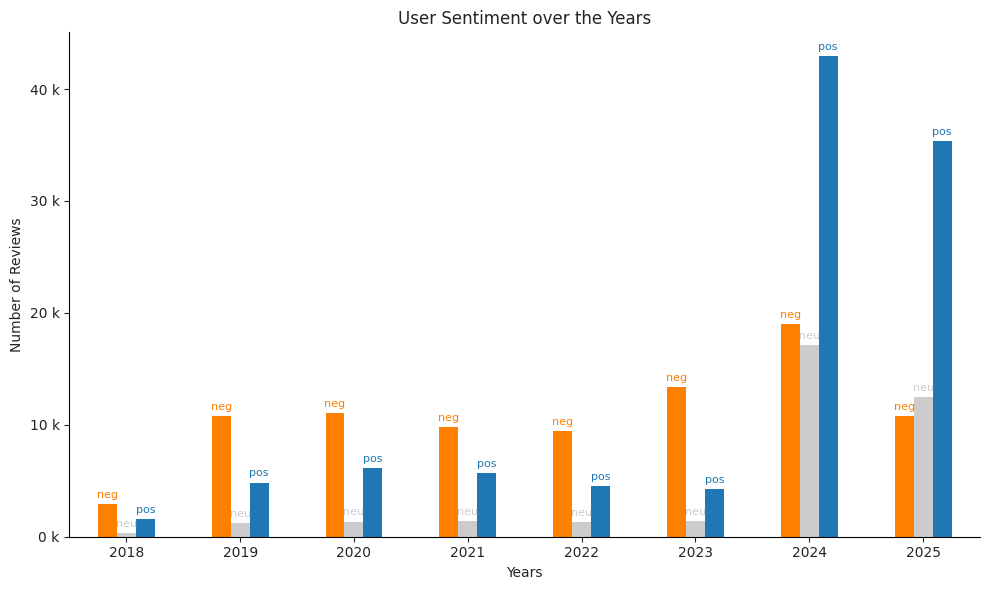

In [23]:
import matplotlib.ticker as ticker
df_sentiment_by_year_unstacked = df_sentiment_by_year.unstack()
light_gray = '#242424'
colors = {'neg': '#ff7f00', 'neu': '#cccccc', 'pos': '#1f78b4'}
ax = df_sentiment_by_year_unstacked.plot(kind='bar', stacked=False, figsize=(10, 6), color=[colors[col] for col in df_sentiment_by_year_unstacked.columns])
ax.get_legend().remove()
Sentiment_labels  = list(colors.keys())

for container,sentiment in zip(ax.containers, Sentiment_labels):
    bar_color = container.patches[0].get_facecolor()
    ax.bar_label(container, fmt=f'{sentiment}', label_type='edge', padding=3, color=bar_color, fontsize=8)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))

ax.tick_params(axis='y', colors=light_gray)
ax.tick_params(axis='x', colors=light_gray)
plt.yticks()
plt.title('User Sentiment over the Years', color=light_gray)
plt.xlabel('Years',color=light_gray)
plt.ylabel('Number of Reviews',color=light_gray)
plt.xticks(rotation=0)
plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

We identified a significant jump in positive sentiment during the years 2024 and 2025, while negative sentiment has remained consistently high. This may suggest that changes or updates in 2024 were well-received by many users, potentially addressing some of their concerns.

In [24]:
df_ratings_by_year = df_new.groupby(['year', 'score']).size()
#display(df_ratings_by_year)

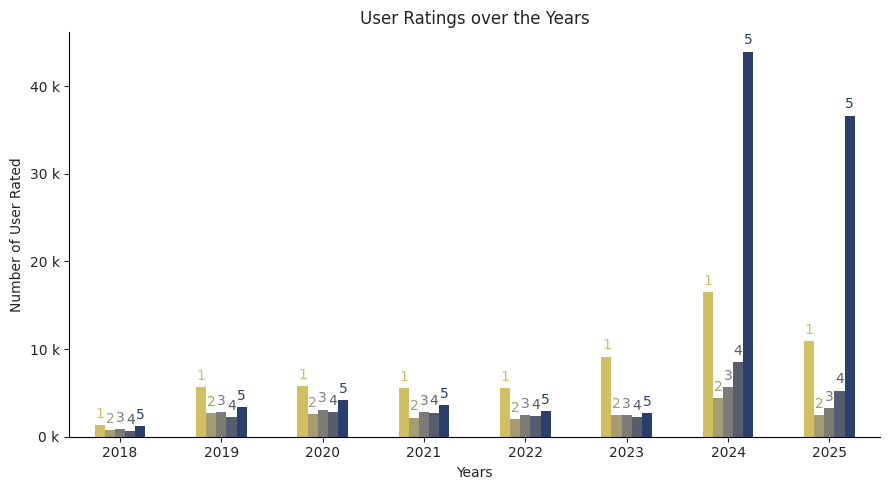

In [25]:
df_ratings_by_year_unstacked = df_ratings_by_year.unstack()
light_gray = '#242424'
ax = df_ratings_by_year_unstacked.plot(
    kind='bar',
    stacked=False,
    figsize=(9, 5),
    color=sns.color_palette("cividis_r", 5)
)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
plt.title('User Ratings over the Years', color=light_gray)
plt.xlabel('Years',color=light_gray)
plt.ylabel('Number of User Rated',color=light_gray)
plt.xticks(rotation=0)
plt.tight_layout()
for i, container in enumerate(ax.containers):
    bar_color = container.patches[0].get_facecolor()
    labels = [str(i + 1)] * len(container)
    ax.bar_label(container, labels=labels, label_type='edge', padding=3, color=bar_color)
ax.get_legend().remove()

ax.tick_params(axis='y', colors=light_gray)
ax.tick_params(axis='x', colors=light_gray)
# Remove top and right spines (box lines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)
plt.show()

**User Ratings Over the Years**

- A significant jump in high ratings (5-star) is observed during the years 2024 and 2025, indicating increased user satisfaction.
- Low ratings (1-star) have remained consistently high, especially in 2024, suggesting persistent issues for some users.
- The data suggests that updates or changes in 2024 were well-received by many users, potentially resolving some concerns.
- However, the continued presence of negative ratings implies that certain problems were not fully addressed.
- The overall pattern shows a polarized user experience, with both highly satisfied and dissatisfied users coexisting.

## Text Preprocessing and Analysing

In [26]:
df_comments = df_new[['content', 'year', 'SentimentLabel']].copy()

In [27]:
df_comments['content'] = df_comments['content'].apply(lambda x: x.lower())

In [28]:
translator = str.maketrans('', '', string.punctuation + string.digits)
df_comments['content_clean'] = df_comments['content'].str.translate(translator)

#### Removing stopwords

In [29]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
# Preparing a list of stop words including custom keywords
stop_words = set(stopwords.words('english'))
custom_words = ['im', 'ive', 'cant', 'couldnt', 'aint', 'arent', 'cant', 'couldnt', 'didnt', 'dont', 'doesnt', 'hadnt', 'hasnt', 'havent', 'hes', 'hed',
                'hell', 'Im', 'id', "Ive", 'Id', 'Ill', 'isnt', 'its', 'itd', 'itll', 'mightnt', 'mustnt', 'shant', 'shes', 'shed', 'shell', 'shouldnt',
                'thats', 'thatd', 'theres', 'thered', 'therell', 'theyre', 'theyve', 'theyd', 'theyll', 'wasnt', 'were', 'weve', 'wed', 'well', 'werent',
                'whats', 'whatd', 'whatll', 'whens', 'wheres', 'whos', 'whod', 'wholl', 'whys', 'wont', 'wouldnt', 'youre', 'youve', 'youd', 'youll',
                'wanna', 'gonna', 'kinda', 'outta', 'gotta', 'ki', 'ko', 'raha', 'etc', 'op', 'ke', 'na', 'h', 'x', 'pl', 'ek', 'io', 'guy', 'rha',
                'koi', 'e', 'ye', 'ap', 'v', 'hai', 'achcha', 'kar', 'hi', 'bhai', 'bhai', 'bhi', 'nahi', 'nhi', 'kuch', 'app', 'snapchat', 'even',
                'soooooooooooooooo', 'omghg', 'lolll', 'veryyy', 'sooo', 'soo', 'baqas', 'خوبه', 'bakbaj', 'ho', 'ka']
stop_words.update(custom_words)

In [31]:
# Fuction to remove stopwords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

In [32]:
df_comments['content_filtered'] = df_comments['content_clean'].apply(remove_stopwords)

In [33]:
df_comments.drop(columns=['content_clean'], inplace=True)
df_comments.head()

,content,year,SentimentLabel,content_filtered
0,easy,2025,neu,easy
1,wow,2025,neu,wow
2,it is slow that is y i didn't give it 5 stars,2025,neg,slow give stars
3,worst app ever 😰🤮🤢🤮🤢🤢🤢,2025,neg,worst ever 😰🤮🤢🤮🤢🤢🤢
4,nazia khan g,2025,neu,nazia khan g


## Word Cloud

In [34]:
positive_text = df_comments[df_comments['SentimentLabel'] == 'pos']['content_filtered'].tolist()
negative_text = df_comments[df_comments['SentimentLabel'] == 'neg']['content_filtered'].tolist()
neutral_text = df_comments[df_comments['SentimentLabel'] == 'neu']['content_filtered'].tolist()

#### Using VADER to select only words with sentiments

In [35]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sEa = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [36]:
def Vader_analyzer(neg_text, neu_text, pos_text):
    neg_text_list = []
    neu_text_list = []
    pos_text_list = []

    for text in neg_text:
        if sEa.polarity_scores(text)['compound'] > 0.05:
            neg_text_list.append(text)
    for text in neu_text:
        if sEa.polarity_scores(text)['compound'] < -0.05:
            neu_text_list.append(text)
    for text in pos_text:
        if -0.05 < sEa.polarity_scores(text)['compound'] < 0.05:
            pos_text_list.append(text)

    return " ".join(neg_text_list), " ".join(neu_text_list), " ".join(pos_text_list)

In [37]:
negative_text_sorted, neutral_text_sorted, positive_text_sorted = Vader_analyzer(negative_text, neutral_text, positive_text)

#### WordCloud for overall user sentiment

In [38]:
from wordcloud import WordCloud
# Initializing WordCloud objects

### Word Cloud for year(2018-2025)

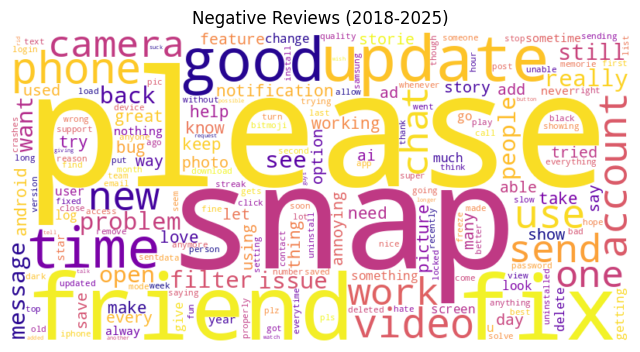

In [39]:
fig, axes = plt.subplots(figsize=(8, 7))
wc_negative = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='plasma',  # Another distinct colormap
    relative_scaling=0.5,
    collocations=False
).generate(negative_text_sorted)
axes.imshow(wc_negative, interpolation='bilinear')
axes.set_title('Negative Reviews (2018-2025)')
axes.axis('off')
plt.show()

#### Insights from Wordcloud "Negative Reviews (2018–2025)":

- The most frequent words in negative reviews highlight user's frustrations with app functionality and performance.
- Common issues include problems with the **camera, video, phone connectivity, account management, messaging, and login errors**.
- Users repeatedly request bug fixes and improvements, as seen in terms like **please, fix, issue, problem, update.**
- Performance-related complaints such as **crashes, freezes, slow loading, and app glitches** are prevalent.
- Features like **filters, streaks, notifications, and chat** are frequently mentioned, indicating areas where users experience dissatisfaction.
- The emotional tone reflects user frustration, with many pleas for help and urgent requests to resolve ongoing problems.
- The word cloud suggests that while new updates may introduce improvements, unresolved issues and technical difficulties continue to impact user experience.

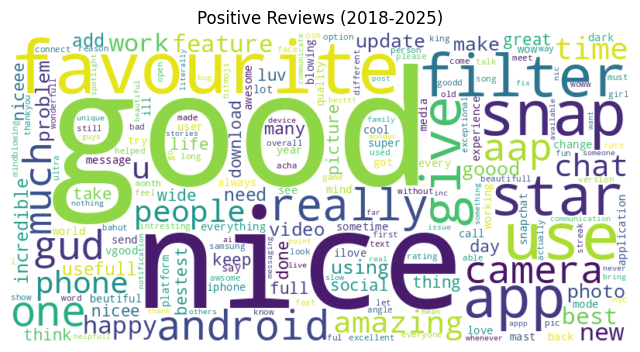

In [40]:
fig, axes = plt.subplots(figsize=(8, 7))
wc_positive = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',  # A perceptually uniform colormap
    relative_scaling=0.5,
    collocations=False
).generate(positive_text_sorted)
axes.imshow(wc_positive, interpolation='bilinear')
axes.set_title('Positive Reviews (2018-2025)')
axes.axis('off')
plt.show()

#### Insights from Wordcloud "Positive Reviews (2018–2025)":

- Users frequently praise the app’s core features, including **filters, camera options, snaps, chat, and star functionalities**, which enhance their overall experience.
- Positive words like **"good", "great", "amazing", "useful", "unique", "best"** indicate high satisfaction and enjoyment with the app’s interface and user-friendly design.
- Updates and new features are appreciated, as seen in mentions of **"feature," "update", "version", and "download"**.
- Social interaction is a major strength, with users enjoying ways to **connect, message, and share content** with others.
- Overall, users express happiness and excitement, viewing the app as a valuable tool for both communication and entertainment.

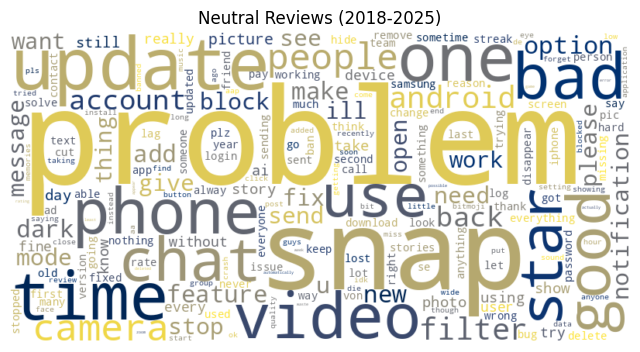

In [41]:
fig, axes = plt.subplots(figsize=(8, 7))
wc_neutral = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='cividis',  # A third colormap
    relative_scaling=0.5,
    collocations=False
).generate(neutral_text_sorted)
axes.imshow(wc_neutral, interpolation='bilinear')
axes.set_title('Neutral Reviews (2018-2025)')
axes.axis('off')
plt.show()

### Summary of Neutral Reviews (2018–2025)

- **Frequent but Manageable Issues:** Users report common problems such as account access difficulties, bugs, and glitches, though these do not severely impact usage.
- **Feature Use and Routine Experience:** Phone, video, filters, dark mode, and other features are frequently mentioned, indicating regular use with occasional frustrations.
- **Account and Accessibility:** Challenges around login, password recovery, and account management are noted, suggesting areas for improvement.
- **Social Interactions:** Users engage through chat, messages, and stories but sometimes encounter inconveniences or limitations.
- **Requests for Improvements:** Many users express the need for additional options, better customization, and streamlined functionality.
- **Mixed Sentiment:** Neutral feedback reflects everyday usage experiences, with users neither fully satisfied nor completely frustrated.

Overall, the neutral reviews highlight a typical user experience characterized by routine interaction, occasional challenges, and a desire for enhancements.

## Word Cloud for latest year: 2025

In [42]:
# Get the most recent year from the data
latest_year = df_comments['year'].max()

# Filter the dataframe for the most recent year
df_latest_year = df_comments[df_comments['year'] == latest_year]

# Separate text data for each sentiment label for the latest year
positive_text_latest = df_latest_year[df_latest_year['SentimentLabel'] == 'pos']['content_filtered'].tolist()
negative_text_latest = df_latest_year[df_latest_year['SentimentLabel'] == 'neg']['content_filtered'].tolist()
neutral_text_latest = df_latest_year[df_latest_year['SentimentLabel'] == 'neu']['content_filtered'].tolist()

# Join the lists of words into strings
negative_text_latest, neutral_text_latest, positive_text_latest = Vader_analyzer(negative_text_latest, neutral_text_latest, positive_text_latest)

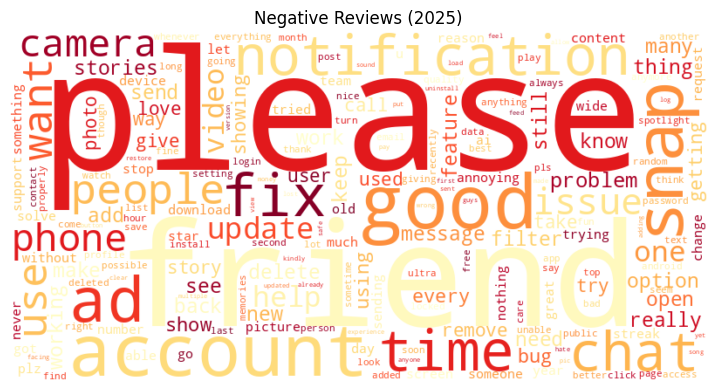

In [43]:
# Generate and display word cloud for negative reviews from the latest year
fig, axes = plt.subplots(figsize=(9, 7))
wc_negative_latest = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='YlOrRd',
    relative_scaling=0.5,
    collocations=False
).generate(negative_text_latest)
axes.imshow(wc_negative_latest, interpolation='bilinear')
axes.set_title(f'Negative Reviews ({latest_year})')
axes.axis('off')
plt.show()

### Insights from Wordcloud "Negative Reviews (2025)":

- **Persistence of Longstanding Issues:** Users continue to report recurring problems with account management, camera, phone connectivity, notifications, filters, and time-related features, indicating unresolved technical debt.
- **User Appeals for Fixes:** The dominance of words like "please", "fix", "issue", "update" shows users are still pleading for help and bug resolutions.
- **Challenges with New Features:** Mentions of tools, stories, ultra access, and additional options suggest that recent feature rollouts are creating confusion or dissatisfaction.
- **Usability and Monetization Concerns:** Complaints related to ads, streaks, login problems, and content removal point to friction both in user experience and in the app’s monetization strategies.
- **Polarized User Experience:** The word cloud reflects a divide, with some users frustrated by lingering bugs while others struggle with adapting to new features introduced in 2025.


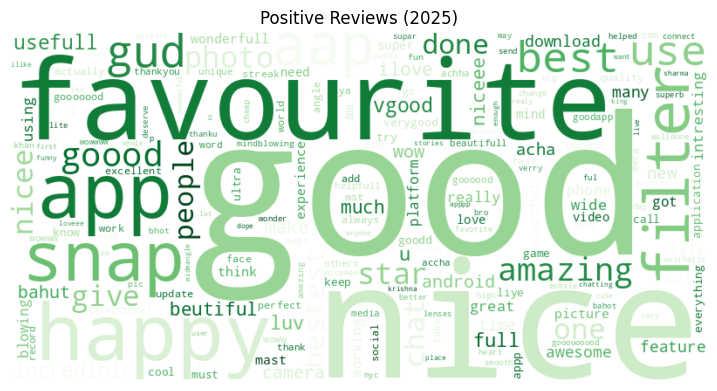

In [44]:
# Generate and display word cloud for positive reviews from the latest year
fig, axes = plt.subplots(figsize=(9, 7))
wc_positive_latest = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Greens',
    relative_scaling=0.5,
    collocations=False
).generate(positive_text_latest)
axes.imshow(wc_positive_latest, interpolation='bilinear')
axes.set_title(f'Positive Reviews ({latest_year})')
axes.axis('off')
plt.show()

### Insights from Wordcloud "Positive Reviews (2025)":
- **Solidification of "Favourite" Status**: The word favourite is exceptionally prominent in 2025. This suggests a shift from users simply "liking" the app to considering it an essential, go-to platform.
- **Sustained Focus on Visuals**: Praise for video and photo capabilities remains strong, reinforcing the importance of the app's visual and creative tools.

In [46]:
from collections import Counter
neg_word_frequencies = wc_negative_latest.words_

In [47]:
Counter(neg_word_frequencies).most_common(10)

[('please', 1.0),
 ('friend', 0.7240663900414938),
 ('good', 0.6701244813278008),
 ('account', 0.6275933609958506),
 ('snap', 0.5518672199170125),
 ('ad', 0.4678423236514523),
 ('fix', 0.4087136929460581),
 ('time', 0.38589211618257263),
 ('notification', 0.3578838174273859),
 ('chat', 0.3516597510373444)]

## Topic Modelling

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [49]:
# Function for topic modelling using LDA for Clear, structured themes and insights.
def perform_topic_modeling_lda(df_comments: pd.DataFrame, sentiment_label: str, num_topics: int = 10, num_top_words: int = 10, Year: int = 2025):
    # Filter by year
    df_year = df_comments[df_comments.year == Year].copy()
    if df_year.empty:
        print(f"No reviews found for year {Year}")
        return

    # Filter by sentiment
    docs = df_year[df_year['SentimentLabel'] == sentiment_label]['content_filtered']
    if docs.empty:
        print(f"No {sentiment_label} reviews found for year {Year}")
        return

    # Vectorize (AS Count is recommended for LDA)
    vectorizer = CountVectorizer(
        max_df=0.95,   # ignore very frequent terms
        min_df=2,      # ignore very rare terms
    )
    X = vectorizer.fit_transform(docs)
    feature_names = vectorizer.get_feature_names_out()

    # Perform LDA on the transformed data
    lda = LatentDirichletAllocation(
        n_components=num_topics,
        random_state=42,
        learning_method="batch"
    )
    lda.fit(X)

    # Print topics
    print(f"\n--- Topics for {sentiment_label} Reviews in {Year} ({num_topics} topics) ---")
    for topic_idx, topic in enumerate(lda.components_):
        top_indices = topic.argsort()[:-num_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_indices]
        print(f"Topic {topic_idx+1}: {', '.join(top_words)}")

In [50]:
perform_topic_modeling_lda(df_comments, 'neg', num_topics=20, num_top_words=10, Year=2025)


--- Topics for neg Reviews in 2025 (20 topics) ---
Topic 1: worst, ever, seen, real, calls, service, experience, filters, calling, option
Topic 2: people, sending, videos, video, snap, like, send, story, post, know
Topic 3: block, content, discover, blocked, stories, still, page, accounts, see, disgusting
Topic 4: delete, change, public, profile, password, option, please, try, really, like
Topic 5: update, new, camera, snaps, back, open, send, phone, chats, load
Topic 6: bad, good, quality, time, waste, experience, bugs, camera, video, like
Topic 7: notifications, getting, notification, get, people, random, turn, annoying, every, ads
Topic 8: ads, ai, annoying, get, chat, pay, ad, top, way, like
Topic 9: click, time, good, like, one, give, snap, get, videos, us
Topic 10: let, poor, aap, people, like, terrible, weird, inappropriate, privacy, useful
Topic 11: remove, pls, friends, use, kids, friend, many, option, people, group
Topic 12: phone, download, number, call, email, use, passwor

### Summary of Negative Review Topics (2025)

- **Technical Issues:** Many users reported problems with the camera, video quality, slow performance, and bugs affecting the app’s reliability.
- **Notifications and Ads:** Complaints about excessive notifications, random alerts, AI-generated content, and intrusive ads are widespread and a major source of frustration.
- **Account and Privacy Concerns:** Issues such as account bans, locked profiles, password problems, privacy breaches, and inappropriate content are frequently raised.
- **User Interaction Challenges:** Users are dissatisfied with difficulties in sending videos, sharing snaps, managing friends, and discovering content.
- **Feature Updates:** Some updates and new features are seen as poorly designed or unnecessary, leading to confusion and dissatisfaction.
- **Requests for Help:** Many users are pleading for technical support and urgent fixes to issues, reflecting gaps in customer assistance and troubleshooting.

Overall, the negative reviews reflect a combination of technical malfunctions, privacy concerns, and frustration with ads and notifications, along with a desire for better support and improved features.

In [51]:
perform_topic_modeling_lda(df_comments, 'pos', num_topics=20, num_top_words=15, Year=2025)


--- Topics for pos Reviews in 2025 (20 topics) ---
Topic 1: love, wow, picture, really, chatting, service, ha, filter, clicking, tha, ittt, results, pics, features, addicted
Topic 2: really, people, interesting, get, friends, fun, many, make, friend, know, filters, things, also, different, lot
Topic 3: amazing, much, filters, happy, funny, use, really, filter, many, must, try, love, pretty, also, make
Topic 4: like, one, bad, really, think, would, thing, update, much, problem, need, song, remove, cause, mind
Topic 5: aap, apps, makes, brilliant, enjoying, look, looking, lot, happy, performance, fine, laugh, girl, se, gorgeous
Topic 6: friends, talk, photo, new, lovely, see, phone, make, people, meet, get, years, still, talking, face
Topic 7: snap, chat, experience, application, photos, favourite, also, working, pics, call, every, reels, selfie, take, send
Topic 8: great, cute, time, download, everyone, day, okay, works, ads, right, privacy, stars, many, recommend, pass
Topic 9: nice, 

### Summary of Positive Review Topics (2025)

- **High Engagement:** Users frequently express excitement and enjoyment, with words like love, wow, fun, amazing, and happy appearing throughout the reviews.
- **Valued Features:** Filters, camera enhancements, video editing tools, and creative effects are some of the most appreciated aspects of the app.
- **Social Connectivity:** The app is praised for enabling users to connect with friends, chat, call, and share moments, strengthening their social interactions.
- **Reliable Performance:** Many users appreciate the app’s stability, safety, and ease of use, recommending it to others despite occasional issues.
- **Customization:** The availability of options and creative tools allows users to personalize their experience and enjoy unique interactions.

In [52]:
# !pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 4.6 MB/s eta 0:00:00


In [53]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [54]:
# Function for topic modelling using BERTopic to demonstrate the depth, nuanced feedback.
def perform_topic_modeling_bertopic(df_comments: pd.DataFrame, sentiment_label: str,
                                    year: int = 2025, embedding_model: str = "all-MiniLM-L6-v2",
                                    top_n_words: int = 10, stop_words = stop_words):
    # Filter by year
    df_year = df_comments[df_comments['year'] == year].copy()
    if df_year.empty:
        print(f"No reviews found for year {year}")
        return None, None, None

    # Filter by sentiment
    docs = df_year[df_year['SentimentLabel'] == sentiment_label]['content_filtered'].dropna().astype(str).tolist()
    if not docs:
        print(f"No {sentiment_label} reviews found for year {year}")
        return None, None, None

    # Load embedding model
    embedding_model = SentenceTransformer(embedding_model)

    # Initialize BERTopic
    topic_model = BERTopic(embedding_model=embedding_model, verbose=True)

    # Fit model
    topics, probs = topic_model.fit_transform(docs)

    # Print topic summary
    print(f"\n--- Topics for {sentiment_label} Reviews in {year} ---")
    display(topic_model.get_topic_info().head(10))

    return topic_model, topics, probs


In [55]:
neg_topic_model, neg_topics, neg_probs = perform_topic_modeling_bertopic(df_comments, sentiment_label='neg', year=2025, stop_words=stop_words)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2025-09-16 13:25:56,346 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/336 [00:00<?, ?it/s]

2025-09-16 13:26:04,677 - BERTopic - Embedding - Completed ✓
2025-09-16 13:26:04,681 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-09-16 13:26:46,222 - BERTopic - Dimensionality - Completed ✓
2025-09-16 13:26:46,224 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-09-16 13:26:46,605 - BERTopic - Cluster - Completed ✓
2025-09-16 13:26:46,612 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-09-16 13:26:46,904 - BERTopic - Representation - Completed ✓



--- Topics for neg Reviews in 2025 ---


,Topic,Count,Name,Representation,Representative_Docs
0,-1,2831,-1_notifications_account_snap_people,"[notifications, account, snap, people, ads, li...",[gives way many phone got banned use create ne...
1,0,561,0_block_discover_content_blocked,"[block, discover, content, blocked, blocking, ...",[number force people see almost naked people w...
2,1,283,1_bad_nothing_much_really,"[bad, nothing, much, really, done, literally, ...","[bad, bad, bad]"
3,2,274,2_filters_filter_working_work,"[filters, filter, working, work, please, prope...","[filters working, filters working, filters wor..."
4,3,222,3_snaps_snap_send_sending,"[snaps, snap, send, sending, score, working, l...","[snaps, let see snaps sending messages snaps, ..."
5,4,214,4_ads_ad_annoying_already,"[ads, ad, annoying, already, game, click, apps...",[ads suck ads playing different add shows long...
6,5,152,5_friends_friend_request_add,"[friends, friend, request, add, unfriend, remo...","[add friends, getting friend request 😭😭, add f..."
7,6,140,6_call_voice_calls_mic,"[call, voice, calls, mic, calling, hear, micro...",[bugs voice call lock screen call second perso...
8,7,127,7_meri_jata_bar_hu,"[meri, jata, bar, hu, mai, kya, baat, bekar, n...",[zyditdutsutxixtckgcyjjf b ni kya kr sakte sab...
9,8,118,8_bakbaj_distractin_mian_laug,"[bakbaj, distractin, mian, laug, mehrag, thats...","[😧😧😧thats say😧😧😧, mian waqas 🤫😡, high laug only😑]"


In [56]:
neg_topic_model.get_topic(0)

[('block', np.float64(0.01776050281805831)),
 ('discover', np.float64(0.016808772665661564)),
 ('content', np.float64(0.016587491564877085)),
 ('blocked', np.float64(0.01374916431554329)),
 ('blocking', np.float64(0.011633726878129075)),
 ('kids', np.float64(0.011116542622644107)),
 ('children', np.float64(0.010898660481890572)),
 ('accounts', np.float64(0.010386040143605)),
 ('page', np.float64(0.010208901010303565)),
 ('inappropriate', np.float64(0.01001015716597406))]

In [57]:
neg_topic_model.visualize_topics()

In [58]:
neg_topic_model.visualize_barchart(top_n_topics=10)

In [59]:
# Showing top words per topic
for topic_id in set(neg_topics):
    if topic_id == -1:
        continue  # skipping outliers
    words = neg_topic_model.get_topic(topic_id)
    top_words = [w for w, _ in words[:5]]
    print(f"Topic {topic_id}: {', '.join(top_words)}")

Topic 0: block, discover, content, blocked, blocking
Topic 1: bad, nothing, much, really, done
Topic 2: filters, filter, working, work, please
Topic 3: snaps, snap, send, sending, score
Topic 4: ads, ad, annoying, already, game
Topic 5: friends, friend, request, add, unfriend
Topic 6: call, voice, calls, mic, calling
Topic 7: meri, jata, bar, hu, mai
Topic 8: bakbaj, distractin, mian, laug, mehrag
Topic 9: device, banned, ss, ban, unban
Topic 10: song, songs, music, playing, available
Topic 11: quality, blur, camera, photo, blurry
Topic 12: good, ten, comingg, lul, agh
Topic 13: chat, feed, ads, ad, chats
Topic 14: notifications, notification, turn, unwanted, typing
Topic 15: account, recover, old, opening, lost
Topic 16: wide, ultra, angle, ultrawide, camera
Topic 17: snap, account, banned, locked, login
Topic 18: update, new, sucks, updates, worse
Topic 19: locked, unlock, account, party, lock
Topic 20: waste, time, wasting, study, teenagers
Topic 21: hours, delete, security, restric

### Summary of Negative Review Topics

- **Technical Problems:** Users frequently experience bugs, glitches, slow performance, crashes, and freezing that affect usability.
- **Camera and Media Issues:** Complaints about blurry photos, poor video quality, wide-angle problems, and memory limitations are widespread.
- **Account and Security Concerns:** Many users face issues with locked or banned accounts, forgotten passwords, hacking, and unauthorized access.
- **Intrusive Advertisements:** Ads are often described as annoying, excessive, or overlapping, with frustrations also around subscriptions, payments, and refunds.
- **Privacy and Ethical Worries:** Concerns over privacy breaches, AI misuse, consent, and inappropriate content are common themes.
- **User Interface Frustrations:** Poor layout design, confusing navigation, and unintuitive controls contribute to user dissatisfaction.
- **Notifications and Communication Issues:** Excessive or irrelevant notifications, along with messaging problems, disrupt user experience.
- **Social Interaction Challenges:** Complaints include friend requests, group management issues, distractions, and addiction concerns.
- **Device Resource Consumption:** Users report overheating, storage issues, battery drain, and compatibility problems with different devices.
- **Negative Sentiment:** Many users express frustration, disappointment, and distrust, describing the app as useless, terrible, or a waste of time.

Overall, users highlight a combination of technical failures, intrusive ads, security concerns, and poor user experience that contribute to widespread dissatisfaction.

### **Final Conclusion**

Snapchat reviews between 2018-2025 show both strong positives and persistent negatives.

**Positives:** Filters, camera quality, and social features drive user enjoyment and loyalty.

**Negatives:** Bugs, intrusive ads, account/security concerns, and confusing updates frustrate users.

**Emerging Risks:** AI misuse, addiction concerns, and resource-heavy features may harm long-term trust.

Overall, while Snapchat remains a favourite platform for many, long-term success requires fixing technical issues, reducing intrusive ads, and improving privacy/security, while continuing to build on creativity and social connection.